In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error 
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
weather_df = pd.read_csv("weather.csv")
weather_df.head()

,date,maxtp(Maximum Air Temperature - degrees C),mintp(Minimum Air Temperature - degrees C),gmin(Grass Minimum Temperature - degrees C),rain(Precipitation Amount - mm),cbl (Mean CBL Pressure-hpa),wdsp(Mean Wind Speed - knot),pe(Potential Evapotranspiration - mm),evap(Evaporation -mm)
0,1-Jan-42,9.7,6.8,4.7,0.0,1020.3,17.2,1.1,1.4
1,2-Jan-42,9.9,7.9,6.7,0.1,1016.2,15.2,0.7,0.9
2,3-Jan-42,11.2,8.9,7.2,1.5,1006.8,14.0,0.5,0.6
3,4-Jan-42,9.2,2.7,3.4,3.5,1001.5,17.0,0.6,0.7
4,5-Jan-42,3.5,-0.8,0,0.6,1013.4,13.0,0.6,0.7


In [3]:
# Converting the date column tp dateformat
weather_df['date'] = pd.to_datetime(weather_df['date'], format="%d-%b-%y")
weather_df['date'] = weather_df['date'].apply(lambda x: x.replace(year=x.year - 100) if x.year > pd.Timestamp.today().year else x)


In [4]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29889 entries, 0 to 29888
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   date                                         29889 non-null  datetime64[ns]
 1   maxtp(Maximum Air Temperature - degrees C)   29889 non-null  float64       
 2   mintp(Minimum Air Temperature - degrees C)   29889 non-null  float64       
 3   gmin(Grass Minimum Temperature - degrees C)  29889 non-null  object        
 4   rain(Precipitation Amount - mm)              29889 non-null  float64       
 5   cbl (Mean CBL Pressure-hpa)                  29889 non-null  float64       
 6   wdsp(Mean Wind Speed - knot)                 29889 non-null  float64       
 7   pe(Potential Evapotranspiration - mm)        29889 non-null  float64       
 8   evap(Evaporation -mm)                        29889 non-null  object        
d

In [5]:
weather_df.head()

,date,maxtp(Maximum Air Temperature - degrees C),mintp(Minimum Air Temperature - degrees C),gmin(Grass Minimum Temperature - degrees C),rain(Precipitation Amount - mm),cbl (Mean CBL Pressure-hpa),wdsp(Mean Wind Speed - knot),pe(Potential Evapotranspiration - mm),evap(Evaporation -mm)
0,1942-01-01,9.7,6.8,4.7,0.0,1020.3,17.2,1.1,1.4
1,1942-01-02,9.9,7.9,6.7,0.1,1016.2,15.2,0.7,0.9
2,1942-01-03,11.2,8.9,7.2,1.5,1006.8,14.0,0.5,0.6
3,1942-01-04,9.2,2.7,3.4,3.5,1001.5,17.0,0.6,0.7
4,1942-01-05,3.5,-0.8,0,0.6,1013.4,13.0,0.6,0.7


In [6]:
# Setting the date column as Index 
weather_df.set_index("date", inplace= True)
weather_df.index.freq = "D"

In [7]:
weather_df.head()

,maxtp(Maximum Air Temperature - degrees C),mintp(Minimum Air Temperature - degrees C),gmin(Grass Minimum Temperature - degrees C),rain(Precipitation Amount - mm),cbl (Mean CBL Pressure-hpa),wdsp(Mean Wind Speed - knot),pe(Potential Evapotranspiration - mm),evap(Evaporation -mm)
date,,,,,,,,
1942-01-01,9.7,6.8,4.7,0.0,1020.3,17.2,1.1,1.4
1942-01-02,9.9,7.9,6.7,0.1,1016.2,15.2,0.7,0.9
1942-01-03,11.2,8.9,7.2,1.5,1006.8,14.0,0.5,0.6
1942-01-04,9.2,2.7,3.4,3.5,1001.5,17.0,0.6,0.7
1942-01-05,3.5,-0.8,0,0.6,1013.4,13.0,0.6,0.7


In [8]:
# Dropping the not required columns
columns_to_drop = ['maxtp(Maximum Air Temperature - degrees C)', 'mintp(Minimum Air Temperature - degrees C)', 'rain(Precipitation Amount - mm)', 'cbl (Mean CBL Pressure-hpa)', 'wdsp(Mean Wind Speed - knot)', 'pe(Potential Evapotranspiration - mm)', 'evap(Evaporation -mm)']
weather_df.drop(columns=columns_to_drop, inplace=True)


In [9]:
weather_df.head()

,gmin(Grass Minimum Temperature - degrees C)
date,
1942-01-01,4.7
1942-01-02,6.7
1942-01-03,7.2
1942-01-04,3.4
1942-01-05,0


In [10]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29889 entries, 1942-01-01 to 2023-10-31
Freq: D
Data columns (total 1 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   gmin(Grass Minimum Temperature - degrees C)  29889 non-null  object
dtypes: object(1)
memory usage: 467.0+ KB


In [11]:
# Convert gmin to numeric
weather_df["gmin(Grass Minimum Temperature - degrees C)"] = pd.to_numeric(weather_df["gmin(Grass Minimum Temperature - degrees C)"], errors='coerce')

In [12]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29889 entries, 1942-01-01 to 2023-10-31
Freq: D
Data columns (total 1 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   gmin(Grass Minimum Temperature - degrees C)  29884 non-null  float64
dtypes: float64(1)
memory usage: 467.0 KB


In [13]:
# Splitting the data from 2019 to 2022 for training
w_train = weather_df.loc["2019-01-01":"2022-12-31"]

In [14]:
# Splitting the data 2023 for testing

w_test = weather_df.loc["2023-01-01":"2023-12-31"]


In [15]:
w_train.tail()

,gmin(Grass Minimum Temperature - degrees C)
date,
2022-12-27,0.1
2022-12-28,2.0
2022-12-29,3.2
2022-12-30,3.1
2022-12-31,4.4


In [16]:
w_test.head()

,gmin(Grass Minimum Temperature - degrees C)
date,
2023-01-01,-0.1
2023-01-02,-0.5
2023-01-03,-3.2
2023-01-04,7.9
2023-01-05,7.4


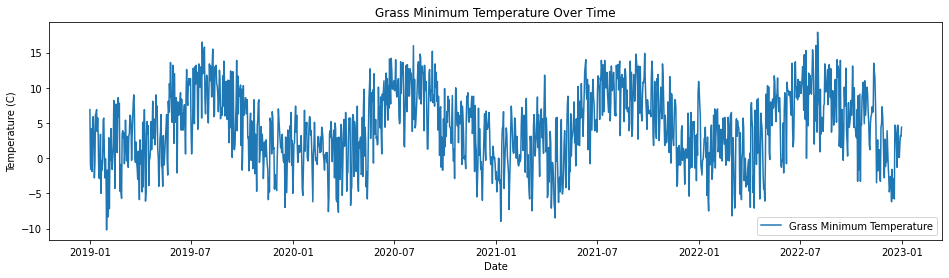

In [17]:
# Plotting the raw data
plt.figure(figsize=(16, 4))
plt.plot(w_train, label='Grass Minimum Temperature')
plt.title('Grass Minimum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

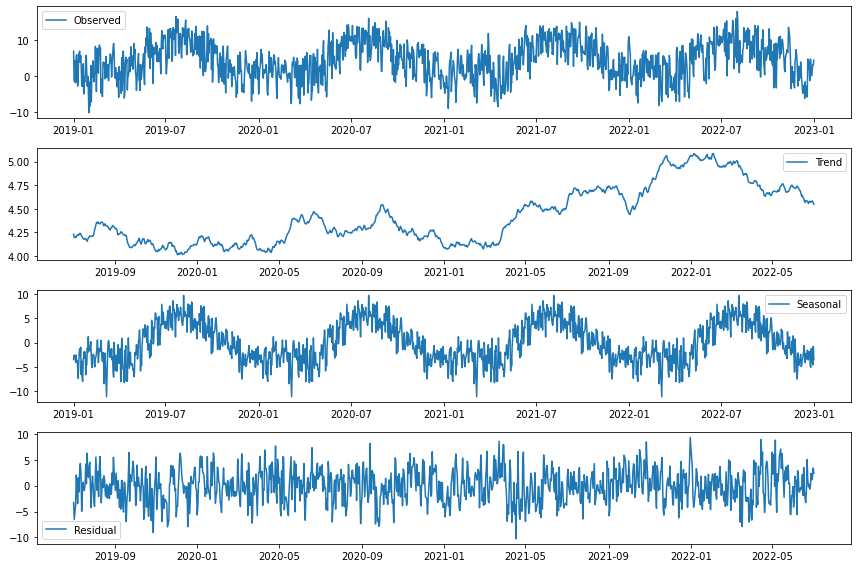

In [18]:
# plotting seasonal decomposition
result = seasonal_decompose(w_train, model='additive', period=365)
# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

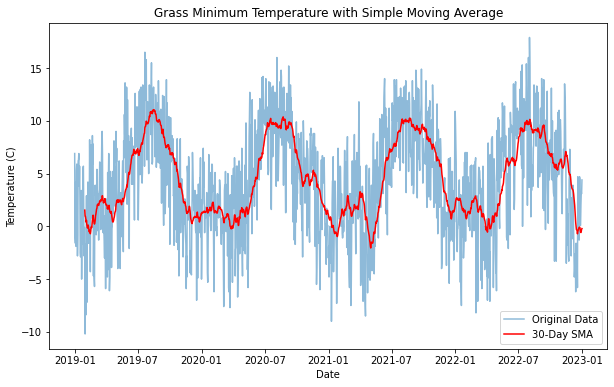

In [19]:
# Using simple moving average to smoothen the time series

sma = w_train.rolling(window=30).mean()

plt.figure(figsize=(10, 6))

plt.plot(w_train, label='Original Data', alpha=0.5)

# Plotting the smoothed data using the simple moving average
plt.plot(sma, label='30-Day SMA', color='red')
plt.title('Grass Minimum Temperature with Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()


In [20]:
sma = sma.dropna()
sma.isnull().sum()
sma_mae = mean_absolute_error(w_train.loc[sma.index], sma)
sma_mape = mean_absolute_percentage_error(w_train.loc[sma.index], sma)
sma_rmse = mean_squared_error(w_train.loc[sma.index], sma)**0.5

print(f"Simple Moving Average- MAE: {sma_mae}, MAPE: {sma_mape}, RMSE: {sma_rmse}")

Simple Moving Average- MAE: 3.253324022346369, MAPE: 64409022603735.945, RMSE: 3.958034386437412


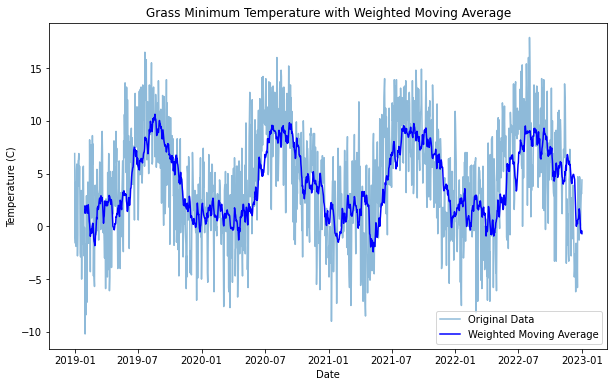

In [21]:
# weights for a window of 30

weights = [0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.05, 0.04, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

# Calculate the weighted moving average
wma = w_train.rolling(window=len(weights)).apply(lambda x: np.sum(weights*x))

plt.figure(figsize=(10, 6))

plt.plot(w_train, label='Original Data', alpha=0.5)

# Plot the smoothed data using the weighted moving average
plt.plot(wma, label='Weighted Moving Average', color='blue')

plt.title('Grass Minimum Temperature with Weighted Moving Average')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

In [22]:
# dropping the na values formed during WMA
wma = wma.dropna()

In [23]:

wma_mae = mean_absolute_error(w_train.loc[wma.index], wma)
wma_mape = mean_absolute_percentage_error(w_train.loc[wma.index], wma)
wma_rmse = mean_squared_error(w_train.loc[wma.index], wma)**0.5

print(f"Weighted Moving Average- MAE: {wma_mae}, MAPE: {wma_mape}, RMSE: {wma_rmse}")

Weighted Moving Average- MAE: 3.531106843575419, MAPE: 57587578754737.03, RMSE: 4.285785165071302


### Exponential smoothing 

In [24]:
# Fitting Simple exponential smoothing
fit_se = SimpleExpSmoothing(w_train).fit()

In [25]:
print(fit_se.summary())

                                    SimpleExpSmoothing Model Results                                   
Dep. Variable:     gmin(Grass Minimum Temperature - degrees C)   No. Observations:                 1461
Model:                                      SimpleExpSmoothing   SSE                          22096.395
Optimized:                                                True   AIC                           3972.505
Trend:                                                    None   BIC                           3983.078
Seasonal:                                                 None   AICC                          3972.532
Seasonal Periods:                                         None   Date:                 Thu, 04 Jan 2024
Box-Cox:                                                 False   Time:                         03:51:36
Box-Cox Coeff.:                                           None                                         
                       coeff                 code              o

In [26]:
# Doin the forecast the next year using 
predict_se = fit_se.forecast(365)
print(predict_se)

2023-01-01    2.596252
2023-01-02    2.596252
2023-01-03    2.596252
2023-01-04    2.596252
2023-01-05    2.596252
                ...   
2023-12-27    2.596252
2023-12-28    2.596252
2023-12-29    2.596252
2023-12-30    2.596252
2023-12-31    2.596252
Freq: D, Length: 365, dtype: float64


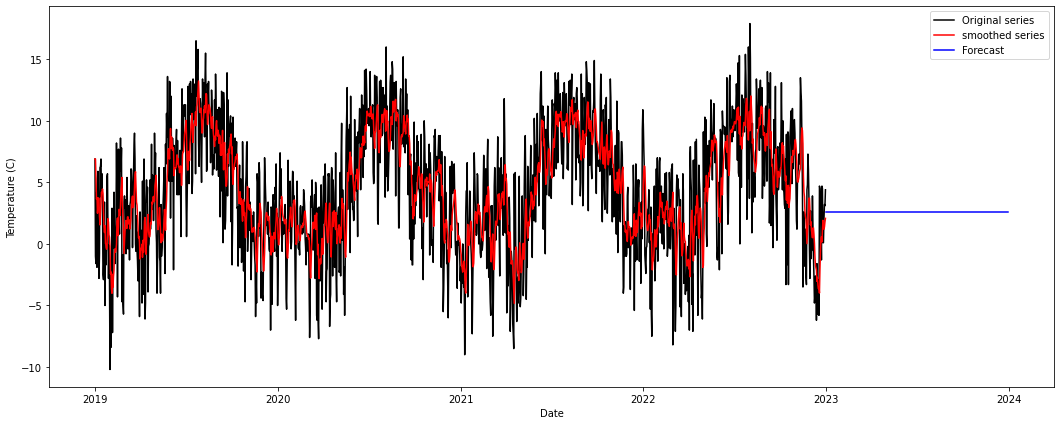

In [27]:
# plotting the produced forecast
plt.figure(figsize=(18, 7))

plt.plot(w_train, color ="black", label="Original series")
plt.plot(fit_se.fittedvalues, color="red", label="smoothed series")
plt.plot(predict_se, color="blue", label="Forecast")
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()

The forecast is just flat which suggest the model is not capable of capture the seasonality from the data.

In [28]:
MAE_se = mean_absolute_error(w_train, fit_se.fittedvalues)
MAPE_se = mean_absolute_percentage_error(w_train, fit_se.fittedvalues)
RMSE_se = mean_squared_error(w_train, fit_se.fittedvalues)**0.5

print(f"Simple Exponential smoothing- MAE: {MAE_se}, MAPE: {MAPE_se}, RMSE: {RMSE_se}")

Simple Exponential smoothing- MAE: 3.171495888013183, MAPE: 83357429928175.38, RMSE: 3.888979036434442


###### Holt's Linear Trend (Double Exponential Smoothing)


In [29]:
# Fitting the Holt's Linear Trend  model
fit_de = Holt(w_train["gmin(Grass Minimum Temperature - degrees C)"]).fit()


In [30]:
print(fit_de.summary())

                                           Holt Model Results                                          
Dep. Variable:     gmin(Grass Minimum Temperature - degrees C)   No. Observations:                 1461
Model:                                                    Holt   SSE                          26060.622
Optimized:                                                True   AIC                           4217.586
Trend:                                                Additive   BIC                           4238.733
Seasonal:                                                 None   AICC                          4217.643
Seasonal Periods:                                         None   Date:                 Thu, 04 Jan 2024
Box-Cox:                                                 False   Time:                         03:51:36
Box-Cox Coeff.:                                           None                                         
                       coeff                 code              o

In [31]:
predict_de = fit_de.forecast(365)
print(predict_de)

2023-01-01     3.952260
2023-01-02     4.189669
2023-01-03     4.427077
2023-01-04     4.664486
2023-01-05     4.901894
                ...    
2023-12-27    89.419332
2023-12-28    89.656741
2023-12-29    89.894150
2023-12-30    90.131558
2023-12-31    90.368967
Freq: D, Length: 365, dtype: float64


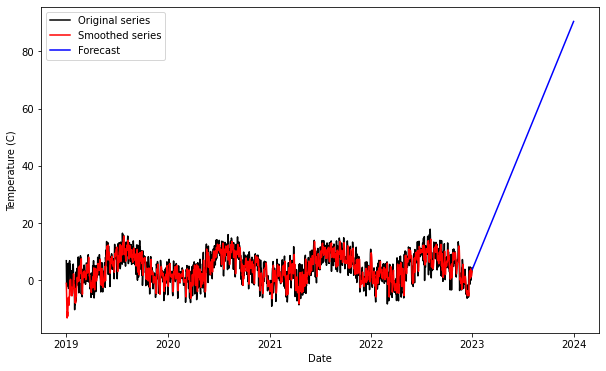

In [32]:
# plotting the produced forecast
plt.figure(figsize=(10, 6))

plt.plot(w_train, color = "black", label="Original series")
plt.plot(fit_de.fittedvalues, color="red", label="Smoothed series")
plt.plot(predict_de, color="blue", label="Forecast")
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()

In [33]:
MAE_de = mean_absolute_error(w_train, fit_de.fittedvalues)
MAPE_de = mean_absolute_percentage_error(w_train, fit_de.fittedvalues)
RMSE_de = mean_squared_error(w_train, fit_de.fittedvalues)**0.5

print(f"Double Exponential smoothing- MAE: {MAE_de}, MAPE: {MAPE_de}, RMSE: {RMSE_de}")

Double Exponential smoothing- MAE: 3.323643806779635, MAPE: 95662219429426.14, RMSE: 4.2234492722855395


### TripleExopnential Smoothing

By observing the raw plot there is increasing trend, and the seasonality appears to be additive 

In [34]:
# Fitting the Triple Exopnential Smoothing
model_tes = ExponentialSmoothing(w_train, trend="additive", seasonal="additive", seasonal_periods=365)
fit_tes = model_tes.fit()
print(fit_tes.summary())

                                   ExponentialSmoothing Model Results                                  
Dep. Variable:     gmin(Grass Minimum Temperature - degrees C)   No. Observations:                 1461
Model:                                    ExponentialSmoothing   SSE                          16382.955
Optimized:                                                True   AIC                           4269.413
Trend:                                                Additive   BIC                           6220.270
Seasonal:                                             Additive   AICC                          4522.878
Seasonal Periods:                                          365   Date:                 Thu, 04 Jan 2024
Box-Cox:                                                 False   Time:                         03:51:39
Box-Cox Coeff.:                                           None                                         
                           coeff                 code           

In [35]:
# Predicting forecast for next 365 days
predict_tes = fit_tes.forecast(365)

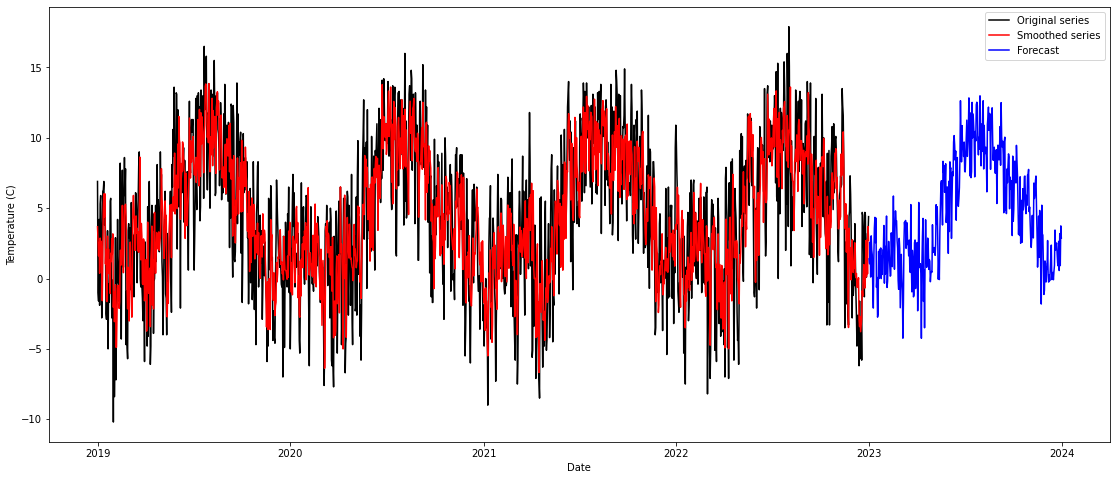

In [36]:
# plotting the produced forecast
plt.figure(figsize=(19, 8))

plt.plot(w_train, color = "black", label="Original series")
plt.plot(fit_tes.fittedvalues, color="red", label="Smoothed series")
plt.plot(predict_tes, color="blue", label="Forecast")
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()

In [37]:
MAE_tes = mean_absolute_error(w_train, fit_tes.fittedvalues)
MAPE_tes = mean_absolute_percentage_error(w_train, fit_tes.fittedvalues)
RMSE_tes = mean_squared_error(w_train, fit_tes.fittedvalues)**0.5

print(f"Triple Exponential smoothing- MAE: {MAE_tes}, MAPE: {MAPE_tes}, RMSE: {RMSE_tes}")

Triple Exponential smoothing- MAE: 2.720393345545765, MAPE: 84706515994518.16, RMSE: 3.3486596364137715


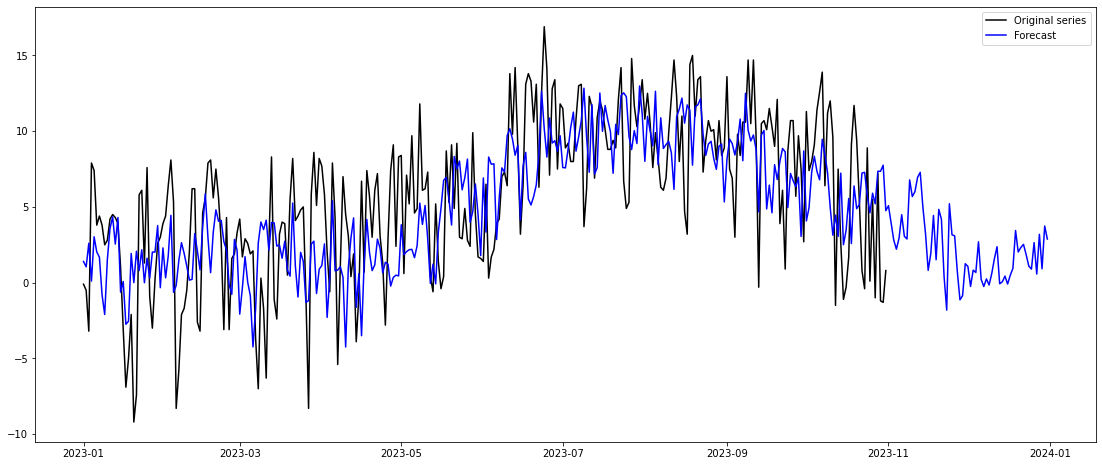

In [38]:
# Testing the Plot with test data
plt.figure(figsize=(19, 8))

plt.plot(w_test, color = "black", label="Original series")
plt.plot(predict_tes, color="blue", label="Forecast")
plt.legend()

### ARIMA / SARIMA 

In [39]:
# Performing the adfuller test to check the stationary
from statsmodels.tsa.stattools import adfuller

adfuller(w_train["gmin(Grass Minimum Temperature - degrees C)"])

(-3.0486298040504654,
 0.030595853228437008,
 21,
 1439,
 {'1%': -3.4349024693573584,
  '5%': -2.8635506057382325,
  '10%': -2.5678404322793846},
 7890.155354090772)

In [40]:
# created function that clearly specifies ADF and  p value
def adfuller_test(data):
    results = adfuller(data)
    print('ADF statistics: {}'.format(results[0]))
    print('P value: {}'.format(results[1]))
    if results[1] <= 0.05:
        print("Rejects the null Hypothesis. Indicating the series is stationary")
    else:
        print("Failed to reject, indicating that the series is not stationary")

In [41]:
adfuller_test(w_train["gmin(Grass Minimum Temperature - degrees C)"])

ADF statistics: -3.0486298040504654
P value: 0.030595853228437008
Rejects the null Hypothesis. Indicating the series is stationary


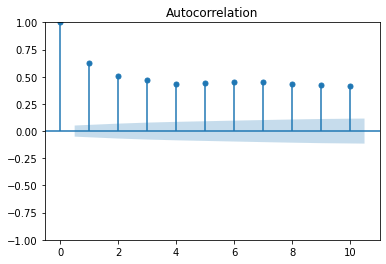

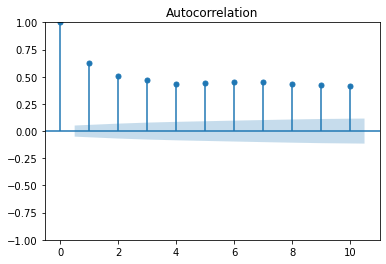

In [42]:
# Plotting the ACF and PACF plot to find out p & q
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(w_train, lags= 10)

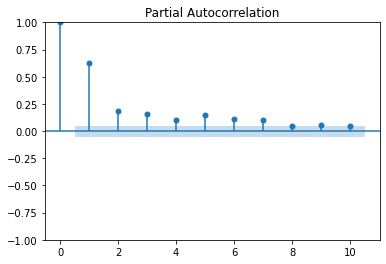

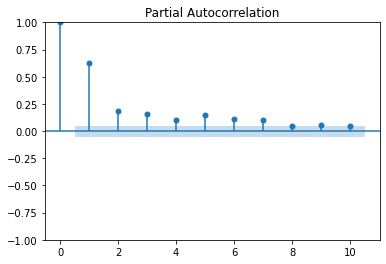

In [43]:
plot_pacf(w_train, lags=10)

The PACF model indicates that the most suitable model will be AR - 2 

First fit (2,0,0). Also try fitting different variations - (2,0,1) (3,0, 0) (3,0,1)

In [44]:
from statsmodels.tsa.arima_model import ARIMA

model1 =sm.tsa.ARIMA(w_train, order=(2,0,0))
fit1 = model1.fit()

print(fit1.summary())

                                            SARIMAX Results                                            
Dep. Variable:     gmin(Grass Minimum Temperature - degrees C)   No. Observations:                 1461
Model:                                          ARIMA(2, 0, 0)   Log Likelihood               -4074.736
Date:                                         Thu, 04 Jan 2024   AIC                           8157.473
Time:                                                 03:51:42   BIC                           8178.620
Sample:                                             01-01-2019   HQIC                          8165.361
                                                  - 12-31-2022                                         
Covariance Type:                                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const     

In [45]:
model2 =sm.tsa.ARIMA(w_train, order=(2, 0, 1))
fit2 = model2.fit()

print(fit2.summary())

                                            SARIMAX Results                                            
Dep. Variable:     gmin(Grass Minimum Temperature - degrees C)   No. Observations:                 1461
Model:                                          ARIMA(2, 0, 1)   Log Likelihood               -4001.835
Date:                                         Thu, 04 Jan 2024   AIC                           8013.671
Time:                                                 03:51:44   BIC                           8040.105
Sample:                                             01-01-2019   HQIC                          8023.531
                                                  - 12-31-2022                                         
Covariance Type:                                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const     

In [46]:
model3 =sm.tsa.ARIMA(w_train, order=(3, 0, 0))
fit3 = model3.fit()

print(fit3.summary())

                                            SARIMAX Results                                            
Dep. Variable:     gmin(Grass Minimum Temperature - degrees C)   No. Observations:                 1461
Model:                                          ARIMA(3, 0, 0)   Log Likelihood               -4056.899
Date:                                         Thu, 04 Jan 2024   AIC                           8123.798
Time:                                                 03:51:44   BIC                           8150.232
Sample:                                             01-01-2019   HQIC                          8133.659
                                                  - 12-31-2022                                         
Covariance Type:                                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const     

In [47]:
model4 =sm.tsa.ARIMA(w_train, order=(1, 0, 0))
fit4 = model4.fit()

print(fit4.summary())

                                            SARIMAX Results                                            
Dep. Variable:     gmin(Grass Minimum Temperature - degrees C)   No. Observations:                 1461
Model:                                          ARIMA(1, 0, 0)   Log Likelihood               -4100.329
Date:                                         Thu, 04 Jan 2024   AIC                           8206.657
Time:                                                 03:51:45   BIC                           8222.518
Sample:                                             01-01-2019   HQIC                          8212.574
                                                  - 12-31-2022                                         
Covariance Type:                                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const     

In [48]:
model5 =sm.tsa.ARIMA(w_train, order=(1, 0, 1))
fit5 = model5.fit()

print(fit5.summary())

                                            SARIMAX Results                                            
Dep. Variable:     gmin(Grass Minimum Temperature - degrees C)   No. Observations:                 1461
Model:                                          ARIMA(1, 0, 1)   Log Likelihood               -4043.614
Date:                                         Thu, 04 Jan 2024   AIC                           8095.228
Time:                                                 03:51:45   BIC                           8116.375
Sample:                                             01-01-2019   HQIC                          8103.116
                                                  - 12-31-2022                                         
Covariance Type:                                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const     

By observing the AIC of all the models model2 with order 2, 0, 1 has the lowest AIC

In [49]:
# Checking using Auto ARIMA

In [50]:
from pmdarima.arima import auto_arima
auto_arima(w_train["gmin(Grass Minimum Temperature - degrees C)"])

ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True)

<AxesSubplot:xlabel='date'>

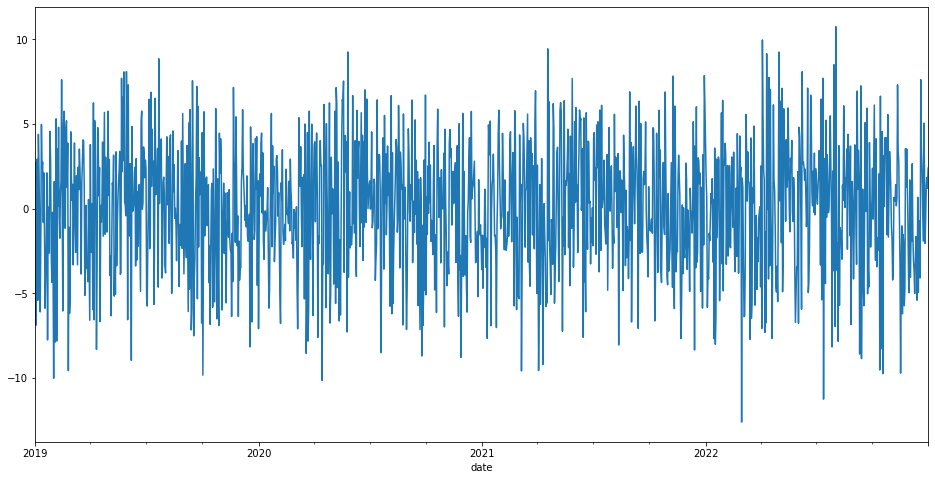

In [51]:
# plotting the residuals to check the whit noise
plt.figure(figsize=(16, 8))
fit2.resid.plot()


In [52]:
# Checking for the serial correlation

from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(fit2.resid)

,lb_stat,lb_pvalue
1,0.008279,0.927501
2,0.040372,0.980016
3,0.136445,0.987131
4,3.299573,0.509000
5,3.357465,0.645056
6,3.551896,0.737053
7,4.905354,0.671512
8,5.013916,0.756088
9,5.097972,0.825685
10,5.471030,0.857578


The p value indicastes that no serial correlation is present

In [53]:
predict_arima = fit2.forecast(len(w_test))

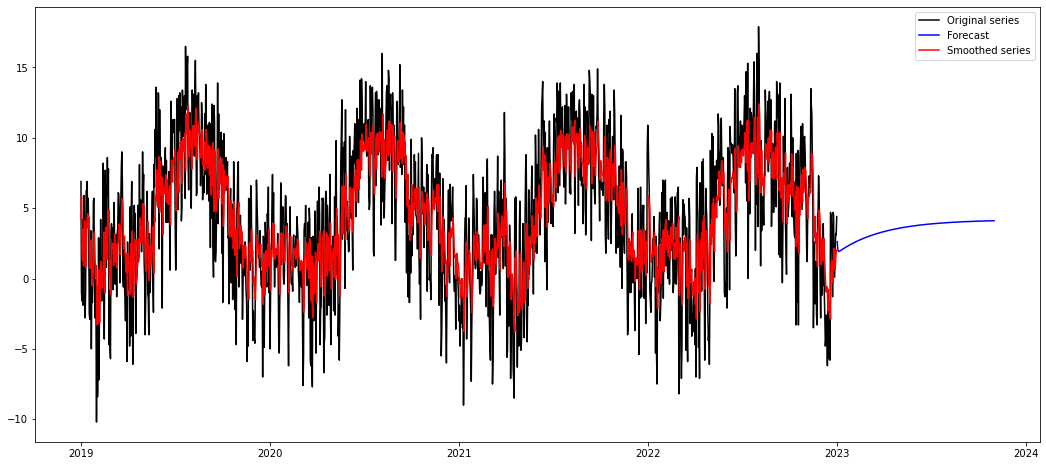

In [54]:
# plotting the produced forecast
plt.figure(figsize=(18, 8))

plt.plot(w_train, color="black", label="Original series")
plt.plot(predict_arima, color="blue", label="Forecast")
plt.plot(fit2.fittedvalues, color="red", label="Smoothed series")

plt.legend()

In [55]:
# Evaluation metrics of model
mae_arima = mean_absolute_error(w_train, fit4.fittedvalues)

rmse_arima = mean_squared_error(w_train, fit4.fittedvalues)**0.5
mape_arima = mean_absolute_percentage_error(w_train, fit4.fittedvalues)

print(f"ARIMA model MAE: {mae_arima} RMSE: {rmse_arima} MAPE: {mape_arima}")

ARIMA model MAE: 3.165011176779077 RMSE: 4.004676822446346 MAPE: 94659596613478.98


In [56]:
# Evaluation metrics of forecast

mae_frc = mean_absolute_error(w_test, predict_arima)

rmse_frc = mean_squared_error(w_test, predict_arima)**0.5
mape_frc = mean_absolute_percentage_error(w_test, predict_arima)

print(f"ARIMA model MAE: {mae_frc} RMSE: {rmse_frc} MAPE: {mape_frc}")

ARIMA model MAE: 4.453517177032362 RMSE: 5.309128890416593 MAPE: 1.4575171000167855


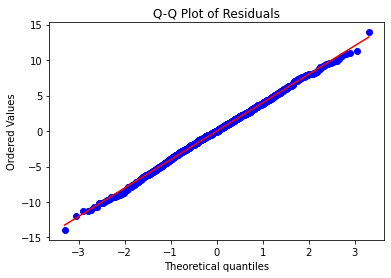

In [57]:
# plotting QQ plot to check if the residuals are nmormally distributed
import scipy.stats as stats
residuals_arima = fit4.resid
stats.probplot(residuals_arima, dist='norm', plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

### 

# Part B Logistic Regression

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import balanced_accuracy_score, classification_report


In [59]:
cardiac_df = pd.read_csv("cardiac.csv")
cardiac_df.head()

,caseno,age,weight,gender,fitness_score,cardiac_condition
0,1,37,70.47,Male,55.79,Absent
1,2,73,50.34,Female,35.00,Absent
2,3,46,87.65,Male,42.93,Present
3,4,36,89.80,Female,28.30,Present
4,5,34,103.02,Male,40.56,Absent


In [60]:
# Splitting the data into train and test
c_train, c_test = train_test_split(cardiac_df, test_size=0.2, random_state=22209484)

In [61]:
# Dropping the caseno column
c_train.drop(columns="caseno", inplace=True)


In [62]:
c_train.head()

,age,weight,gender,fitness_score,cardiac_condition
63,31,94.68,Male,44.94,Absent
38,43,85.13,Male,45.69,Absent
73,32,82.41,Male,49.40,Absent
48,40,51.96,Female,50.05,Absent
55,39,59.78,Female,47.71,Absent


In [63]:
# Dropping the caseno column
c_test.drop(columns="caseno", inplace=True)
c_test.head()

,age,weight,gender,fitness_score,cardiac_condition
91,50,103.53,Male,45.23,Present
80,42,92.43,Male,47.26,Absent
93,36,70.84,Male,55.91,Absent
41,47,101.06,Male,35.60,Present
54,42,64.00,Female,35.00,Present


In [64]:
c_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 63 to 51
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                80 non-null     int64  
 1   weight             80 non-null     float64
 2   gender             80 non-null     object 
 3   fitness_score      80 non-null     float64
 4   cardiac_condition  80 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 3.8+ KB


This indicated there are no missing values

In [65]:
# Descriptive statistics
c_train.describe().T


,count,mean,std,min,25%,50%,75%,max
age,80.0,41.387500,9.088167,31.0,34.0000,40.00,46.0000,73.00
weight,80.0,79.954875,15.284541,50.0,69.7325,80.13,89.4625,115.42
fitness_score,80.0,43.543875,8.020165,28.3,37.4750,42.73,48.7850,62.13


In [66]:
# EDA
c_train.head()

,age,weight,gender,fitness_score,cardiac_condition
63,31,94.68,Male,44.94,Absent
38,43,85.13,Male,45.69,Absent
73,32,82.41,Male,49.40,Absent
48,40,51.96,Female,50.05,Absent
55,39,59.78,Female,47.71,Absent


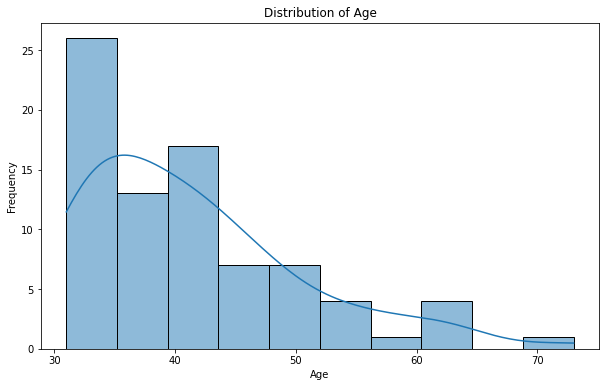

In [67]:
# Exploring the age groups in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(data= c_train, x='age', bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

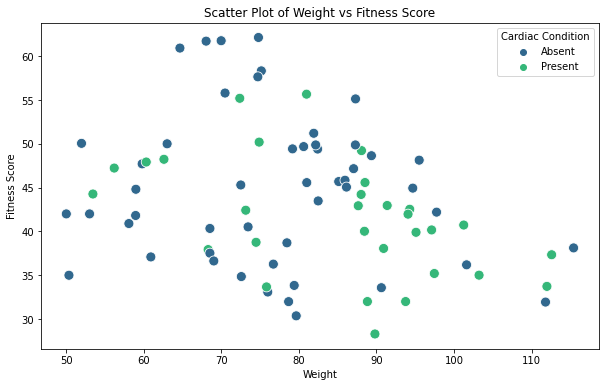

In [68]:
# scatter plot for weight and fitness score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=c_train, x='weight', y='fitness_score', hue='cardiac_condition', palette='viridis', s=100)
plt.title('Scatter Plot of Weight vs Fitness Score')
plt.xlabel('Weight')
plt.ylabel('Fitness Score')
plt.legend(title='Cardiac Condition')
plt.show()


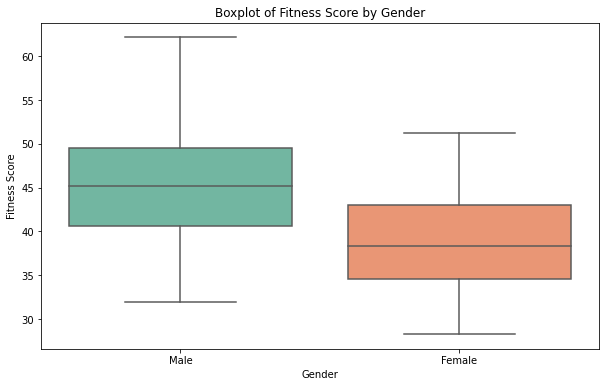

In [69]:

# Boxplot of Fitness Score by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=c_train, x='gender', y='fitness_score', palette='Set2')
plt.title('Boxplot of Fitness Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Fitness Score')
plt.show()

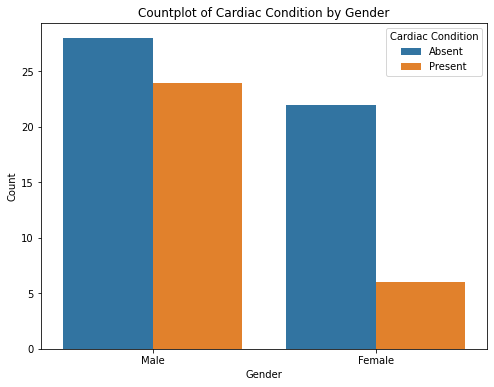

In [70]:
plt.figure(figsize=(8, 6))
sns.countplot(data=c_train, x='gender', hue='cardiac_condition')
plt.title('Countplot of Cardiac Condition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Cardiac Condition')
plt.show()

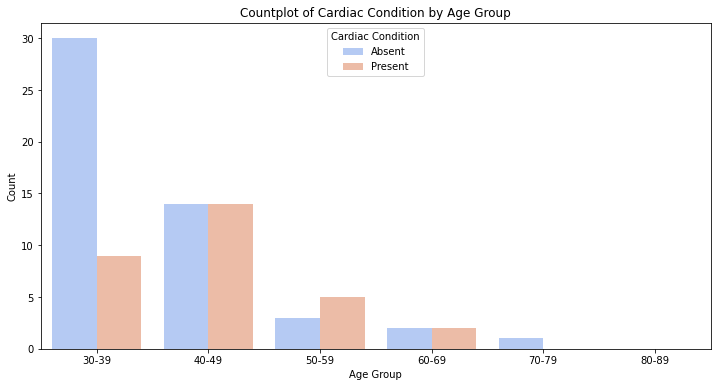

In [71]:
# Creating age groups
age_bins = [30, 40, 50, 60, 70, 80, 90]
age_labels = ['30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
c_train['age_group'] = pd.cut(c_train['age'], bins=age_bins, labels=age_labels, right=False)

# plot of Cardiac Condition by Age Group
plt.figure(figsize=(12, 6))
sns.countplot(data=c_train, x='age_group', hue='cardiac_condition', palette='coolwarm')
plt.title('Countplot of Cardiac Condition by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Cardiac Condition')
plt.show()

In [72]:
# Dropping the age group column created for the above plot
c_train.drop(columns = 'age_group', inplace=True)

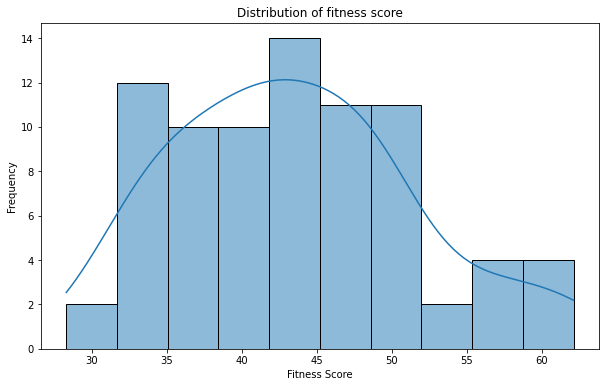

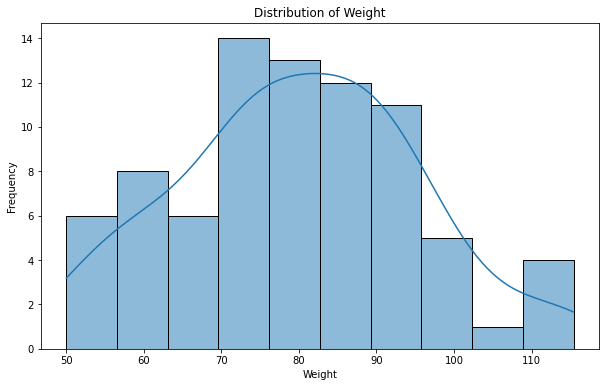

In [73]:
# Checking for skewness
plt.figure(figsize=(10, 6))
sns.histplot(data= c_train, x='fitness_score', bins=10, kde=True)
plt.title('Distribution of fitness score')
plt.xlabel('Fitness Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))

sns.histplot(data= c_train, x='weight', bins=10, kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [74]:
# label encoding all the categorical values

categorical_features = c_train.select_dtypes(include=['object']).columns
categorical_features_test = c_test.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

# Transforming categorical features to numeric
for feature in categorical_features:
    c_train[feature] = label_encoder.fit_transform(c_train[feature])

for feature in categorical_features_test:
    c_test[feature] = label_encoder.fit_transform(c_test[feature])

In [75]:
c_train.head()

,age,weight,gender,fitness_score,cardiac_condition
63,31,94.68,1,44.94,0
38,43,85.13,1,45.69,0
73,32,82.41,1,49.40,0
48,40,51.96,0,50.05,0
55,39,59.78,0,47.71,0


In [76]:
#  performing Normalization on all train features
feat_scaling = [feature for feature in c_train.columns] 

scaler = MinMaxScaler()
c_train.loc[:, feat_scaling] = scaler.fit_transform(c_train[feat_scaling])



In [77]:
c_train.head()

,age,weight,gender,fitness_score,cardiac_condition
63,0.000000,0.682972,1.0,0.491871,0.0
38,0.285714,0.536992,1.0,0.514041,0.0
73,0.023810,0.495414,1.0,0.623707,0.0
48,0.214286,0.029960,0.0,0.642920,0.0
55,0.190476,0.149496,0.0,0.573751,0.0


In [78]:
# Performinh normalization on test data
feat_scaling_t = [feature for feature in c_train.columns]  

scaler = MinMaxScaler()
c_test.loc[:, feat_scaling_t] = scaler.fit_transform(c_test[feat_scaling_t])
c_test.head()

,age,weight,gender,fitness_score,cardiac_condition
91,0.454545,1.000000,1.0,0.508677,1.0
80,0.272727,0.771275,1.0,0.566430,0.0
93,0.136364,0.326396,1.0,0.812518,0.0
41,0.386364,0.949104,1.0,0.234708,1.0
54,0.272727,0.185452,0.0,0.217639,1.0


In [79]:
# Splitting the train and test data further to x and y datasets

x_train = c_train.drop(columns="cardiac_condition")
y_train = c_train["cardiac_condition"]

x_test = c_test.drop(columns="cardiac_condition")
y_test = c_test["cardiac_condition"]


In [80]:
# Now time to fit the model 

fit_1 = sm.Logit(y_train, sm.add_constant(x_train)).fit()

Optimization terminated successfully.
         Current function value: 0.548073
         Iterations 6


In [81]:
# Model summary

print(fit_1.summary()) 

                           Logit Regression Results                           
Dep. Variable:      cardiac_condition   No. Observations:                   80
Model:                          Logit   Df Residuals:                       75
Method:                           MLE   Df Model:                            4
Date:                Thu, 04 Jan 2024   Pseudo R-squ.:                  0.1715
Time:                        03:52:02   Log-Likelihood:                -43.846
converged:                       True   LL-Null:                       -52.925
Covariance Type:            nonrobust   LLR p-value:                  0.001149
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.1369      1.090     -1.043      0.297      -3.272       0.999
age               2.4980      1.249      2.000      0.045       0.050       4.946
weight            0.2233      1.511     

Considering common significance level of 0.05. The coefficient for weight is not statistically significant

In [82]:
x_train.drop(['weight'],axis=1, inplace=True)
x_test.drop(['weight'],axis=1, inplace=True)

In [83]:
# Model 2

fit_2 = sm.Logit(y_train, sm.add_constant(x_train)).fit()
print(fit_2.summary())

Optimization terminated successfully.
         Current function value: 0.548210
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      cardiac_condition   No. Observations:                   80
Model:                          Logit   Df Residuals:                       76
Method:                           MLE   Df Model:                            3
Date:                Thu, 04 Jan 2024   Pseudo R-squ.:                  0.1713
Time:                        03:52:02   Log-Likelihood:                -43.857
converged:                       True   LL-Null:                       -52.925
Covariance Type:            nonrobust   LLR p-value:                 0.0004122
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0172      0.727     -1.400      0.162      -2.442       0.407
age               2.

All variables seems having a significant impact

In [84]:
# Log odds ratio

np.exp(fit_2.params)


const             0.361604
age              11.818802
gender            6.976059
fitness_score     0.035741
dtype: float64

In [85]:
# Performing wald test

fit_2.wald_test("(age=0, gender=0, fitness_score=0)")


C:\Users\pranav\anaconda3\lib\site-packages\statsmodels\base\model.py:1914: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[13.16868383]], p-value=0.004285660475356119, df_denom=3>

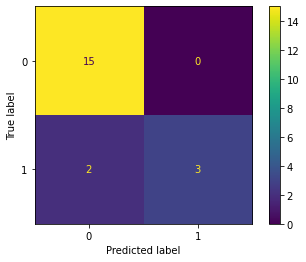

In [86]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predict_prob_2 = fit_2.predict(sm.add_constant(x_test))

prediction_2 = [1 if x > 0.5 else 0 for x in predict_prob_2]

ConfusionMatrixDisplay(confusion_matrix(y_test, prediction_2)).plot()

It can be observed that the model predicted 2 outcomes incorrectly, when it was 1 it predicted 0 twice

In [87]:
# Calculating Common metrics
print(classification_report(y_test, prediction_2))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        15
         1.0       1.00      0.60      0.75         5

    accuracy                           0.90        20
   macro avg       0.94      0.80      0.84        20
weighted avg       0.91      0.90      0.89        20



In [88]:
balanced_accuracy_score(y_test, prediction_2)

0.8